In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
import keras.backend as K

Using TensorFlow backend.
/home/genom/Sacred-MNIST/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/genom/Sacred-MNIST/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/genom/Sacred-MNIST/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/genom/Sacred-MNIST/env/lib/pytho

In [2]:
train_da, test_da = mnist.load_data()
x_train, y_train = train_da 
x_test, y_test = test_da

5 0 4 1
9 2 1 3
1 4 3 5
3 6 1 7


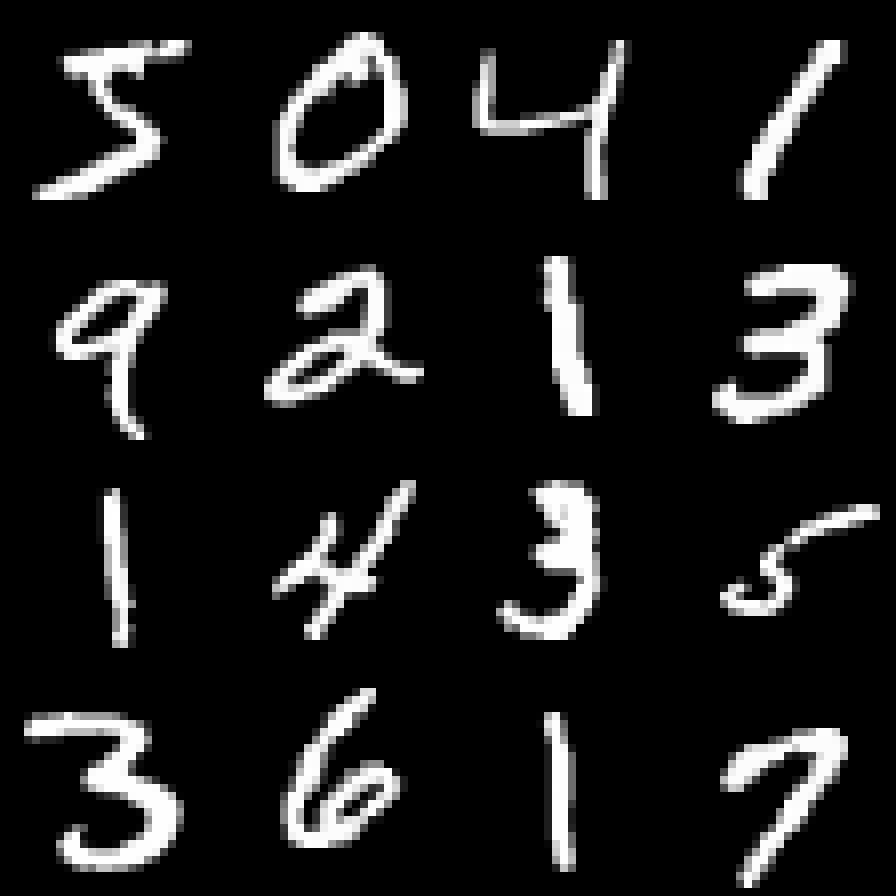

In [3]:
from IPython.display import Image
from PIL import Image
import numpy as np
import imageio


#im = imageio.imread('./dig5.png')
#x_train[0]=im

a = np.concatenate(x_train[0:4], axis=1)
print(" ".join([str(x) for x in y_train[0:4]]))
for i in range(3):
    a = np.concatenate([a, np.concatenate(x_train[4+i*4:8+i*4], axis=1)], axis=0)
    print(" ".join([str(x) for x in y_train[4+i*4:8+i*4]]))
img = Image.fromarray(a, 'L')
img.resize((896, 896), Image.NEAREST)

In [4]:
data_format = K.image_data_format()
rows, cols = 28, 28
num_classes = 10
train_size = x_train.shape[0]
test_size = x_test.shape[0]

if data_format == 'channels_first':
    x_train = x_train.reshape(train_size, 1, rows, cols)
    x_test = x_test.reshape(test_size, 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(train_size, rows, cols, 1)
    x_test = x_test.reshape(test_size, rows, cols, 1)
    input_shape = (rows, cols, 1)
    
# norm data to float in range 0..1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to one hot vector
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
x_train = x_train[:100]
y_train = y_train[:100]

In [6]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
None


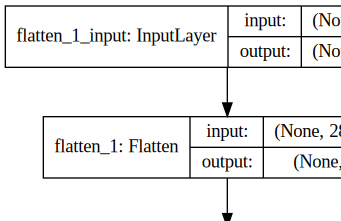

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [8]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

In [9]:
batch_size = 128
epochs = 20

In [10]:
from keras.callbacks import ModelCheckpoint, Callback

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test),
    callbacks=[ModelCheckpoint("myWeights.hdf5", monitor='val_loss', save_best_only=True, mode='auto', period=1)]
)

    
#history = model.fit(
#    x_train, y_train,
#    batch_size=batch_size,
#    epochs=epochs,
#    verbose=1,
#    validation_data=(x_test, y_test)
#)




Train on 100 samples, validate on 10000 samples
Epoch 1/20
100/100 [==============================] - 0s 2ms/step - loss: 2.4276 - accuracy: 0.0600 - val_loss: 2.3526 - val_accuracy: 0.0871
Epoch 2/20
100/100 [==============================] - 0s 804us/step - loss: 2.3525 - accuracy: 0.0700 - val_loss: 2.3088 - val_accuracy: 0.0979
Epoch 3/20
100/100 [==============================] - 0s 977us/step - loss: 2.2805 - accuracy: 0.1100 - val_loss: 2.2679 - val_accuracy: 0.1114
Epoch 4/20
100/100 [==============================] - 0s 1ms/step - loss: 2.2115 - accuracy: 0.1600 - val_loss: 2.2294 - val_accuracy: 0.1355
Epoch 5/20
100/100 [==============================] - 0s 1ms/step - loss: 2.1455 - accuracy: 0.2000 - val_loss: 2.1934 - val_accuracy: 0.1703
Epoch 6/20
100/100 [==============================] - 0s 991us/step - loss: 2.0824 - accuracy: 0.2700 - val_loss: 2.1594 - val_accuracy: 0.2097
Epoch 7/20
100/100 [==============================] - 0s 1ms/step - loss: 2.0220 - accuracy: 

In [11]:
from matplotlib import pyplot as plt

# utility to display a row of digits with their predictions
def display_digits(digits, predictions, labels, title, n):
  plt.figure(figsize=(13,3))
  digits = np.reshape(digits, [n, 28, 28])
  digits = np.swapaxes(digits, 0, 1)
  digits = np.reshape(digits, [28, 28*n])
  plt.yticks([])
  plt.xticks([28*x+14 for x in range(n)], predictions)
  for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
    if predictions[i] != labels[i]: t.set_color('red') # bad predictions in red
  plt.imshow(digits)
  plt.grid(None)
  plt.title(title)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test1 loss:', score[0])
print('Test1 accuracy:', score[1])

im = imageio.imread('./dig5.png')
pix = np.empty([28, 28, 1])   
for i in range(0,28):
    for j in range(0,28):
        pix[i][j][0]=0.0 # im[i][j]/256
        
x_test[0]=pix
x_test[1]=pix
x_test[2]=pix

score = model.evaluate(x_test, y_test, verbose=1)
print('Test2 loss:', score[0])
print('Test2 accuracy:', score[1])



# recognize digits from local fonts
pixim = np.empty([1,28,28,1])   
for i in range(0,28):
    for j in range(0,28):
        pixim[0][i][j][0] = im[i][j]/256
        
N=1        
font_labels = [5]
probabilities = model.predict(pixim, steps=1)
predicted_labels = np.argmax(probabilities, axis=1)
print(predicted_labels)
display_digits(pixim, predicted_labels, font_labels, "predictions from local fonts (bad predictions in red)", N)



Test1 loss: 1.784161280441284
Test1 accuracy: 0.48030000925064087
10000/10000 [==============================] - 0s 19us/step
Test2 loss: 1.7843147563934325
Test2 accuracy: 0.48030000925064087
[8]


In [12]:
from pandas import DataFrame
df_loss = DataFrame(data={
    'Epoche': history.epoch * 2,
    'Legende': ['Loss auf Trainingsdaten'] * len(history.epoch) + ['Loss auf Testdaten'] * len(history.epoch),
    'Loss': history.history['loss'] + history.history['val_loss']
})
df_accuracy = DataFrame(data={
    'Epoche': history.epoch * 2,
    'Legende': ['Accuracy auf Trainingsdaten'] * len(history.epoch) + ['Accuracy auf Testdaten'] * len(history.epoch),
#    'Accuracy': history.history['acc'] + history.history['val_acc']
    'Accuracy': history.history['accuracy'] + history.history['val_accuracy']
})
print(df_loss)
print(df_accuracy)

    Epoche                  Legende      Loss
0        0  Loss auf Trainingsdaten  2.427578
1        1  Loss auf Trainingsdaten  2.352463
2        2  Loss auf Trainingsdaten  2.280463
3        3  Loss auf Trainingsdaten  2.211515
4        4  Loss auf Trainingsdaten  2.145531
5        5  Loss auf Trainingsdaten  2.082398
6        6  Loss auf Trainingsdaten  2.021974
7        7  Loss auf Trainingsdaten  1.964100
8        8  Loss auf Trainingsdaten  1.908602
9        9  Loss auf Trainingsdaten  1.855296
10      10  Loss auf Trainingsdaten  1.803992
11      11  Loss auf Trainingsdaten  1.754501
12      12  Loss auf Trainingsdaten  1.706641
13      13  Loss auf Trainingsdaten  1.660249
14      14  Loss auf Trainingsdaten  1.615181
15      15  Loss auf Trainingsdaten  1.571321
16      16  Loss auf Trainingsdaten  1.528582
17      17  Loss auf Trainingsdaten  1.486904
18      18  Loss auf Trainingsdaten  1.446254
19      19  Loss auf Trainingsdaten  1.406621
20       0       Loss auf Testdate

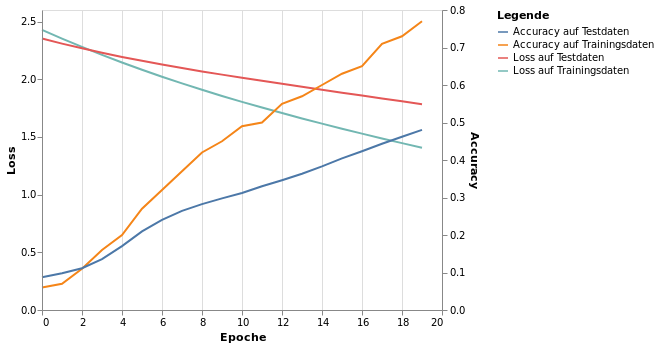

In [13]:
import altair as alt
alt.renderers.enable('notebook')

chart_loss = alt.Chart(df_loss).mark_line().encode(
    x='Epoche', y='Loss', color='Legende')
chart_accuracy = alt.Chart(df_accuracy).mark_line().encode(
    x='Epoche', y='Accuracy', color='Legende')
chart = chart_loss + chart_accuracy
chart.resolve_scale(y='independent')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________
None


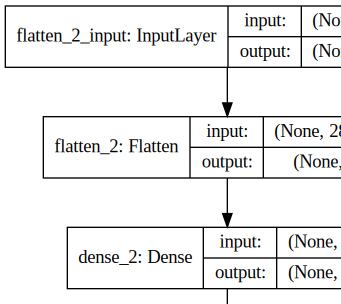

In [14]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(400, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [15]:
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 100 samples, validate on 10000 samples
Epoch 1/20
100/100 [==============================] - 0s 2ms/step - loss: 2.3247 - accuracy: 0.1300 - val_loss: 2.1081 - val_accuracy: 0.2925
Epoch 2/20
100/100 [==============================] - 0s 1ms/step - loss: 1.9453 - accuracy: 0.4800 - val_loss: 1.9511 - val_accuracy: 0.4359
Epoch 3/20
100/100 [==============================] - 0s 1ms/step - loss: 1.6417 - accuracy: 0.7300 - val_loss: 1.8198 - val_accuracy: 0.5096
Epoch 4/20
100/100 [==============================] - 0s 2ms/step - loss: 1.3909 - accuracy: 0.8400 - val_loss: 1.6964 - val_accuracy: 0.5599
Epoch 5/20
100/100 [==============================] - 0s 2ms/step - loss: 1.1734 - accuracy: 0.8600 - val_loss: 1.5787 - val_accuracy: 0.5915
Epoch 6/20
100/100 [==============================] - 0s 2ms/step - loss: 0.9834 - accuracy: 0.9000 - val_loss: 1.4718 - val_accuracy: 0.6150
Epoch 7/20
100/100 [==============================] - 0s 2ms/step - loss: 0.8204 - accuracy: 0.9200 

In [16]:
def evaluate(model, history):
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    
    df_loss = DataFrame(data={
        'Epoche': history.epoch * 2,
        'Legende': ['Loss auf Trainingsdaten'] * len(history.epoch) + ['Loss auf Testdaten'] * len(history.epoch),
        'Loss': history.history['loss'] + history.history['val_loss']
    })
    df_accuracy = DataFrame(data={
        'Epoche': history.epoch * 2,
        'Legende': ['Accuracy auf Trainingsdaten'] * len(history.epoch) + ['Accuracy auf Testdaten'] * len(history.epoch),
 #    'Accuracy': history.history['acc'] + history.history['val_acc']
    'Accuracy': history.history['accuracy'] + history.history['val_accuracy']
   })
    chart_loss = alt.Chart(df_loss).mark_line().encode(
        x='Epoche', y='Loss', color='Legende')
    chart_accuracy = alt.Chart(df_accuracy).mark_line().encode(
        x='Epoche', y='Accuracy', color='Legende')
    chart = chart_loss + chart_accuracy
    return chart.resolve_scale(y='independent')

Test loss: 1.0650453818798065
Test accuracy: 0.6762999892234802


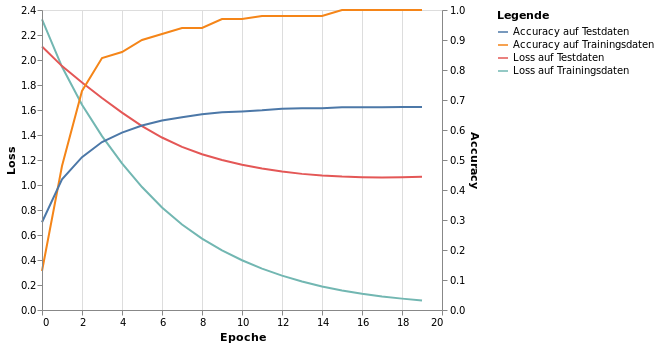

In [17]:
evaluate(model, history)

In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

train_size = x_train.shape[0]
test_size = x_test.shape[0]

data_format = K.image_data_format()
if data_format == 'channels_first':
    x_train = x_train.reshape(train_size, 1, rows, cols)
    x_test = x_test.reshape(test_size, 1, rows, cols)
    input_shape = (1, rows, cols)
else:
    x_train = x_train.reshape(train_size, rows, cols, 1)
    x_test = x_test.reshape(test_size, rows, cols, 1)
    input_shape = (rows, cols, 1)
    
# norm data to float in range 0..1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to one hot vector
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 400)               314000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                4010      
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________
None


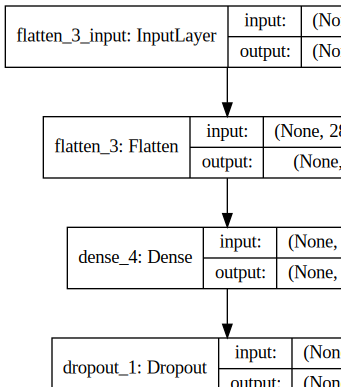

In [19]:
model = Sequential()
model.add(Flatten(input_shape=input_shape))
model.add(Dense(400, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [20]:
batch_size = 128
epochs = 12

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 3s 52us/step - loss: 0.3522 - accuracy: 0.8969 - val_loss: 0.1641 - val_accuracy: 0.9516
Epoch 2/12
60000/60000 [==============================] - 3s 53us/step - loss: 0.1677 - accuracy: 0.9517 - val_loss: 0.1129 - val_accuracy: 0.9661
Epoch 3/12
60000/60000 [==============================] - 3s 52us/step - loss: 0.1269 - accuracy: 0.9630 - val_loss: 0.0895 - val_accuracy: 0.9735
Epoch 4/12
60000/60000 [==============================] - 3s 50us/step - loss: 0.1060 - accuracy: 0.9684 - val_loss: 0.0792 - val_accuracy: 0.9762
Epoch 5/12
60000/60000 [==============================] - 3s 53us/step - loss: 0.0889 - accuracy: 0.9730 - val_loss: 0.0726 - val_accuracy: 0.9770
Epoch 6/12
60000/60000 [==============================] - 3s 55us/step - loss: 0.0797 - accuracy: 0.9756 - val_loss: 0.0685 - val_accuracy: 0.9787
Epoch 7/12
60000/60000 [==============================] - 3s 54us/st

Test loss: 0.05342771918206708
Test accuracy: 0.983299970626831


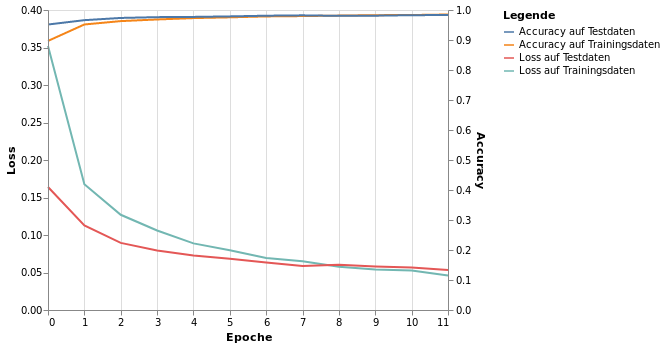

In [21]:
evaluate(model, history)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 200)               1843400   
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)             

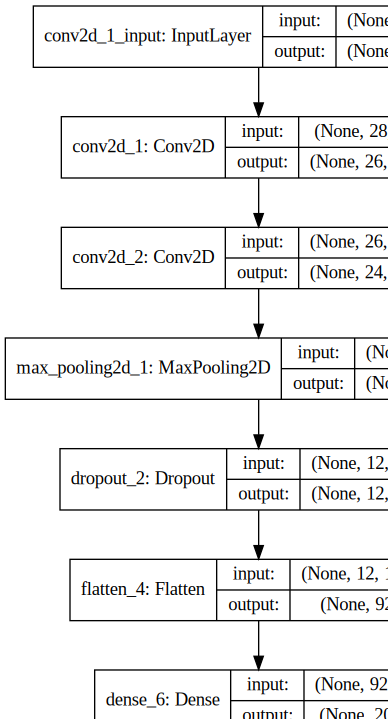

In [22]:
model = Sequential()
model.add(Conv2D(
             32, kernel_size=(3, 3), 
             activation='relu', 
             input_shape=input_shape))
model.add(Conv2D(
             64, kernel_size=(3, 3), 
             activation='relu'))
model.add(MaxPooling2D(
             pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(num_classes, activation='softmax'))
print(model.summary())
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

![Struktur des Convolutional Network](Convnet.svg)

In [23]:
batch_size = 128
epochs = 12

model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 69s 1ms/step - loss: 0.2042 - accuracy: 0.9380 - val_loss: 0.0512 - val_accuracy: 0.9834
Epoch 2/12
60000/60000 [==============================] - 103s 2ms/step - loss: 0.0692 - accuracy: 0.9793 - val_loss: 0.0389 - val_accuracy: 0.9878
Epoch 3/12
60000/60000 [==============================] - 111s 2ms/step - loss: 0.0521 - accuracy: 0.9844 - val_loss: 0.0307 - val_accuracy: 0.9902
Epoch 4/12
60000/60000 [==============================] - 112s 2ms/step - loss: 0.0426 - accuracy: 0.9864 - val_loss: 0.0332 - val_accuracy: 0.9891
Epoch 5/12
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0369 - accuracy: 0.9884 - val_loss: 0.0275 - val_accuracy: 0.9909
Epoch 6/12
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0302 - accuracy: 0.9901 - val_loss: 0.0254 - val_accuracy: 0.9924
Epoch 7/12
60000/60000 [==============================] - 113s 

Test loss: 0.02621365138364704
Test accuracy: 0.9930999875068665
[5]
[[1.2902319e-12 2.4011518e-15 3.4872492e-16 7.4730897e-09 1.5662518e-11
  9.9999869e-01 1.4492496e-09 1.6508753e-14 3.2778649e-10 1.3575279e-06]]


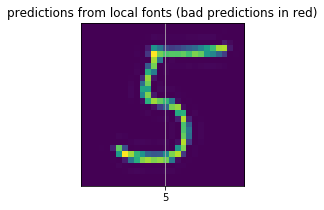

In [24]:
evaluate(model, history)

N=1        
font_labels = [5]
probabilities = model.predict(pixim, steps=1)
predicted_labels = np.argmax(probabilities, axis=1)
print(predicted_labels)
print(probabilities)
display_digits(pixim, predicted_labels, font_labels, "predictions from local fonts (bad predictions in red)", N)


Schöne 3D-Visualisierung eines Convolutional Networks für MNIST: http://scs.ryerson.ca/~aharley/vis/conv/